In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gradient Descent
> Written by Nick Stanisha and Ryan Soklaski

Given that 

\begin{equation}
\frac{d}{dx}x^n = nx^{n-1}
\end{equation}

Write a function, `poly_grad` that computes the derivative of a polynomial of arbitrary degree, evaluated at some specified value for $x$.

That is, if we want to compute the derivative of $f(x) = 0\;x^0 + 2\;x^1 + 4\;x^2$, at $x=2$:

\begin{equation}
\frac{df}{dx} = 0 + 2\;x^0 + 8\;x^1\\
\frac{df}{dx}\Bigr|_{x=2} = 0 + 2 + 8\;(2)^1 = 18
\end{equation}

Accordingly, your function `poly_grad` should behave as follows:
```python
>>> poly_grad((0, 2, 4), 2)
18
```
where we specify the polynomial by simply specifying its coefficients in ascending order of power.

Because we are working with a single-variable function, we can simply evaluate the derivative rather than a gradient (i.e. `poly_grad` will return a number rather than a vector).

In [21]:
import numpy as np
def poly_grad(coefs, x):
    """ Computes the derivative of a polynomial with coefficients `coefs`, evaluated 
        at `x`.
    
        Parameters
        ----------
        coefs : Tuple[float]
            The polynomial coefficients in increasing order (C0, C1, C2, ...)
            
            This corresponds to the polynomial: C0 + C1*x + C2*(x**2) + ...
            
            If `coefs` is an empty tuple, then the polynomial is 0.
            
        x : float
            The value at which to evaluate the derivative
        
        Returns
        -------
        float
            The derivative of the polynomial function at x
        
        Examples
        -------
        >>> # Using the polynomial: 0 + 2*x + 4*(x ** 2)
        >>> # compute the derivative when x = 2
        >>> # i.e. 8*(2) + 2 -> 18
        >>> poly_grad([0, 2, 4], 2)
        18
    """
    if (len(coefs) == 0 or len(coefs) == 1): return float(0);
    if (len(coefs) == 2): return float(coefs[1]);
    
    N = np.size(co);
    co = np.array(coefs);
    mult = np.linspace(0,N-1,N);
    co = co * mult;
   
    var = np.zeros(N);
    var = var + x;
    pw = np.concatenate((np.array([0]),np.linspace(0,N-2,N-1)));
    var = var ** pw;
    
    return float(np.sum(var * co));

In [22]:
from bwsi_grader.cogworks.gradient_learning import grade_polygrad
grade_polygrad(poly_grad)


============================== ALL TESTS PASSED! ===============================
Your submission code: bw15310ce42ce28e4c824c045c24d390448d1facb75533000af85ee14a



Now, implement vanilla gradient descent in order *minimize* the polynomial. Refer to the course material from this module for a detailed discussion of gradient descent.

This function will not only iteratively update `x` to try to minimize `f(x)`, but it will also keep track of all of the values of `x` during this process. This will allow us to make some nice visualizations of the gradient descent process.

A note about your implementation: do not worry about dividing $\frac{df}{dx}$ by $\left|\frac{df}{dx}\right|$. This is a case where doing so will actually slow down our minimization process. (If you don't know what I'm talking about, revisit the section on gradient descent in the module).

After you implement gradient descent and produce the visualization, see if you can envision what the gradient descent trajectory would have looked like if you *had* normalized the step-size, $\delta$, by $\left|\frac{df}{dx}\right|$ so that each step taken was of an equal length.

In [23]:
def grad_descent(poly, step_size=0.1, iterations=10, x=100.):
    """ Returns a list of x-values visited when optimizing `poly` through gradient descent 
    
        Parameters
        ----------
        poly : List[float]
            Polynomial coefficients in increasing order
        step_size : Optional[float], default: 0.1
            The magnitude of the step to take for each update of x
        iterations : Optional[int], default: 10
            After this number of iterations, the grad_descent function should return
        x : Optional[float], default: 100.
            The initial value of x
        
        Returns
        -------
        x_list : list
            A list of the values of x that were visited, including
            the initial value of x.
        
        Notes
        -----
        Pseudo-code for this
        - Initialize x_list to contain the initialized value `x`
        - Until you've exhausted the total number of iterations
          - Compute the gradient (just the derivative) of poly with respect to x
          - Update x using stepsize
          - Add the new value of x to x_list
        - Return x_list
    """
    x_list = [];
    x_list.append(x);
    for _ in range(iterations):
        df = poly_grad(poly,x);
        x -= step_size * df;
        x_list.append(x);
    return x_list
    

In [24]:
from bwsi_grader.cogworks.gradient_learning import grade_gradient_descent
grade_gradient_descent(grad_descent)


============================== ALL TESTS PASSED! ===============================
Your submission code: bw7de65f31063f1ea4c327adf3c2567d627279f5e59bec108414e18c38



Illustrating gradient descent to find the minimum of $f(x) = 2x ^2 + 15$. The following cell uses your `grad_descent` function, and plots the "trajectory" of 15 steps taken via gradient descent. We use a step-size of $\delta = 0.1$

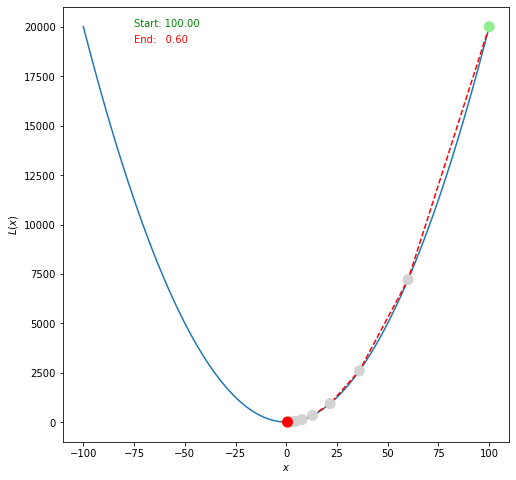

In [26]:
# Execute this cell; it will run your `grad_descent` function and will plot 
# the "trajectory" of the x-values visited.
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2])
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list, [2*(x**2) + 15 for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");

Notice that by making iterative adjustments to the variable $x$, we are able to find the _value of x which minimizes the value of the polynomial_. Take a moment to consider why this is important in a machine learning context. Instead of an arbitrary polynomial, what if this function described _how wrong our current model is_ (i.e. if the polynomial was a **loss function**), and $x$ represented a trainable model parameter. Keep in mind that instead of a single parameter $x$, in reality we will want to optimize over _thousands or millions of parameters_ which describe our model.

(Also note that the fact that the minimum lies at $x = 0$ is merely a facet of this simple example. We are finding the value of $x$ that minimizes $f$, whatever it may be.)

By making iterative adjustments, exactly like the ones we've just implemented, we could find the _model parameters_ that _minimize our loss function_. Therefore, if our mathematical description of "error" accurately reflects what a human would consider to be "bad", then we could make our learned model perform better and better as it undergoes training. This, in essence, is what machine learning is -- finding the values of  the parameters of a complex model that minimize the loss function that we derived for some task. By following the gradient to improve those parameters, software can _learn from data_ to get better at performing that task.

### Practical Issues for Gradient Descent 
Recall from your reading that there are three major issues that arise when utilizing gradient descent. 
 1. It is not clear what step-size should be used when updating your parameters. 
 2. The gradient descent method can only reveal that you are at the bottom of a valley - it cannot indicate that you are at the bottom of the lowest valley. 
 3. One must take care, when coming up with a loss function, to ensure that the function is differentiable.
 
We'll demonstrate points 1 and 2 in this section.

In the following cell, we use a step-size of $\delta=0.4$ to perform gradient descent on the same function. Although we end up near the minimum, we take much larger steps to get there than before. So far, it isn't clear if $\delta=0.4$ is any better or worse than $\delta=0.1$.

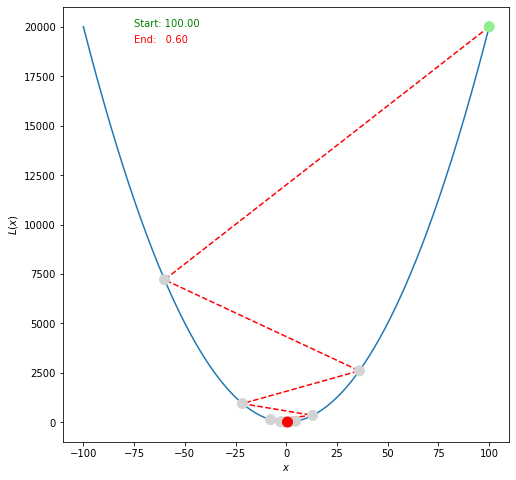

In [27]:
# execute this cell
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2], step_size=0.4)
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list, [2*(x**2) + 15 for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");

In the cell below, we perform gradient descent with a step-size of $\delta = 0.6$, beginning at x=3. Using such a large step size causes us to move *away* from the minimum! It may seem like we started near the minimum, but note the scale of the y-axis.

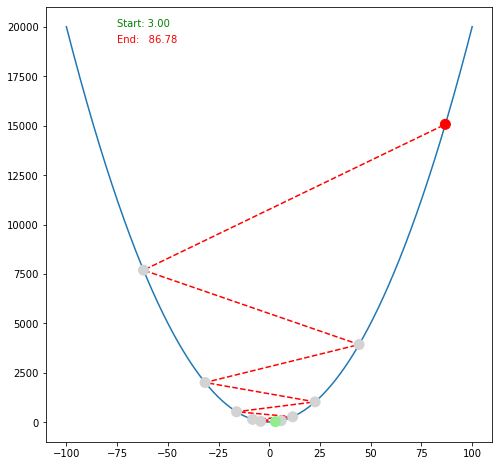

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2], step_size=0.6, x=3) 
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list[::-1], [2*(x**2) + 15 for x in x_list][::-1], c=colors[::-1], s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red');

You can see that, depending on your gradient descent implementation, the path to the global minimum is not always smooth and, if you are too aggressive with your `step_size`, you can actually _diverge_ from the minimum, even if you start close to it. Just like $k$ in the $k$-nearest neighbor classifier from your previous assignment, the gradient descent step size is a _hyperparameter_ of your model, which you must set prior to the training process (however, there are variations on gradient descent which adjust the step size automatically while performing the optimization). Cross-validation can be used to arrive at a good step-size (a.k.a. learning rate).

## Non-convex functions
Notice that $2x^{2} + 15$ is a [convex function](https://en.wikipedia.org/wiki/Convex_function). Convex functions are generally bowl-shaped and have a single, unique global minimum. Although convex functions are useful for learning about optimization, most of the functions that we will be minimizing to train our machine learning models ("loss functions") will be non-convex over our model's parameters. A simple example of a non-convex function is shown below. 

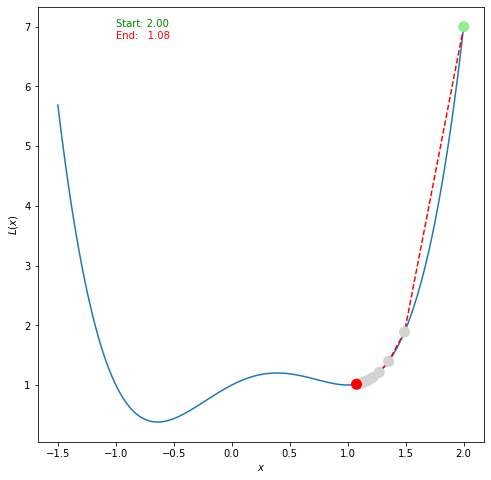

In [29]:
#execute this cell to plot gradient descent for a non-convex function

fig, ax = plt.subplots(figsize=(8, 8))

x = np.linspace(-1.5, 2, 1001)

def f(x):
    return 1 + x - (x ** 2) - (x ** 3) + (x ** 4)

x_list = grad_descent([1, 1, -1, -1, 1], x=2, step_size=0.03)
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(x, f(x))
ax.plot(x_list, [f(x) for x in x_list], c='r', ls='--')
ax.scatter(x_list, [f(x) for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-1, 7, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-1, 6.8, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");


Notice in this example that the minimum that gradient descent finds, $(1, 1)$, looks good from the perspective of the algorithm. However, what gradient descent is incapable of seeing is that a better solution lies just beyond the hill that peaks around $x = 0.4$.

Can you think of any good ways to help rattle your model out of this non-optimal minimum? 

# Machine Learning
Now that we have learned about gradient descent, it is time to use it to create our first "intelligent" software. Imagine that you work for a company that produces films and you've been tasked with forecasting how well a movie is going to perform once it is released. Instead of using your own intuition, you could train a model using historical data, and use it to predict how a new movie is going to do. Let's say that you have the following data (all measured in millions of dollars):

* The first year box office sales
* The amount of money spent producing the movie
* The amount of money spent promoting the movie
* The total book sales (you can assume all of your movies are based on books)

Using this data, how can we predict how well a movie is going to do (box office sales)?

In [30]:
data = {
    'Box Office Sales': [85.1, 106.3, 50.2, 130.6, 54.8, 30.3, 79.4, 91.0, 135.4, 89.3],
    'Production Costs': [8.5, 12.9, 5.2, 10.7, 3.1, 3.5, 9.2, 9.0, 15.1, 10.2],
    'Promotion Costs': [5.1, 5.8, 2.1, 8.4, 2.9, 1.2, 3.7, 7.6, 7.7, 4.5],
    'Book Sales': [4.7, 8.8, 15.1, 12.2, 10.6, 3.5, 9.7, 5.9, 20.8, 7.9]
}

Let's begin by plotting box office sales against the other data.

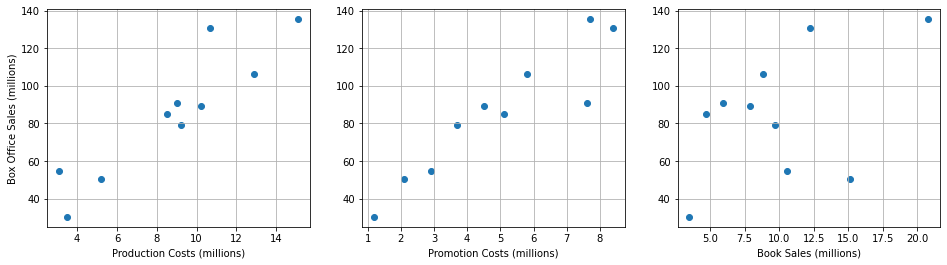

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for var, ax in zip(['Production Costs', 'Promotion Costs', 'Book Sales'], axes):
    ax.scatter(data[var], data['Box Office Sales'])
    ax.set_xlabel(var + ' (millions)')
    ax.grid(True)
    if var == 'Production Costs':
        ax.set_ylabel('Box Office Sales (millions)')

From the looks of things, it seems like production and promotion costs are strongly correlated with box office success (this should match up with your intution: a big-budget movie like "The Avengers" will normally sell more tickets than smaller, independent films).

Let's try to use *supervised learning* to train a model to make predictions. We will need to:
 1. Devise a model that is capable of taking input data regarding a movie, and using its parameters to map this to a prediction of the movie's earnings.
 2. Create a (differentiable) loss function that measures how well the model's prediction compares to "truth data" (i.e. actual Box Office numbers)
 3. Refine the model's parameters by using gradient descent to find the model parameter values that minimize the loss function.

## Regression

You have primarily enountered *classification problems* up to this point. For example, your $k$-means clustering model classified images based on whether they contained dogs, trucks, etc. This entails predicting a discrete value (i.e. a label).

Here we will use supervised learning (we are learning from labels) to train a model to predict a *continuous quantity* rather than a discrete category. This type of analysis is called _regression_ and it has many applications in statistics, data science, medicine, marketing, and other domains.

## Approach

Remember our general approach for machine learning: 
- Construct a model that is able to take input data and make a prediction using that data and parameters stored within the model.
- Summarize the performance of our model's prediction with a "loss function": a bad prediction should produce a higher loss-value than a good prediction.
- Make our model's performance less-bad through iterative improvements to its parameters, such that the loss function is being minimized; that is, perform gradient descent to adjust the model's parameters in an effort to find values that minimize the loss function 

We will introduce use the model parameters $A_{bias}, A_{prod}, A_{prom}, A_{book}$, to map our input data, $X$ (which represents the production costs, promotion costs, and book sales) to the predicted box office earnings, $\hat{y}$, via some function $f$. 

\begin{equation}
\hat{y} = f(X; A_{bias}, A_{prod}, A_{bias}, A_{book})
\end{equation}

Our model's prediction mechanism is represented by this function $f(X; A_{bias},  A_{prod}, A_{prom}, A_{book}, )$. Note that we use a semicolon to simply separate the input-data variable from the model parameters.


$A_{prod}$, $A_{prom}$, and $A_{book}$ will affect how heavily the prediction costs, promotion costs, and book sales should be weighed, when predicting the box office earnings. $A_{bias}$ allows the model to make gross shifts to the predicted value. 

Then, we must score how good our model's prediction is with a loss function, $g$, which must compare our predicted output, $\hat{y}$, against the expected output, $y$.

\begin{equation}
L = g(y, \hat{y})
\end{equation}

Using gradient descent on $L$ with respect to our parameters $A_{bias},  A_{prod}, A_{prom}, A_{book}$, we will _learn parameters values for our model that minimize the error of the model's predictions_.

### Loss Function

For each of the $N$ movies in our dataset, our model will produce an estimate of the box office sales. One common choice for a loss function is the average squared error over all the data.

\begin{equation}
L = \frac{1}{N}\sum_{i = 1}^{N} (y_i - \hat{y}_{i})^2
\end{equation}

$y_i$ is the true Box Office earning for movie $i$, and $\hat{y}_{i}$ is our model's predicted earning for that movie. 

Our loss takes the difference between the predicted earning and the historical Box Office earning, squares it, and computes the average of this squared difference for all of the movies in our training data. 

Notice that this function penalizes $\hat{y}$ equally regardless of whether the predicted income is larger or smaller than the true earning. Also, if our predictions are perfect, the loss drops to 0. Lastly, note that our loss function is *differentiable*, which is necessary in order to perform gradient descent.

### Defining the Model
Now we need to arrive at the functional form for our model, $f$. There appears to be roughly a linear correlation between the three different pieces of input data (promotion costs, production costs, and book earnings) and the Box Office earnings. Thus we will design our model to perform a *linear mapping* from the input data to the predicted earning.

For each movie, we have the financial data $X = [X_{prod}, X_{prom}, X_{book}]$. A simple way to predict box office sales from this data is to construct a weighted sum of these features using our parameters

\begin{equation}
f(X; A_{bias},  A_{prod}, A_{prom}, A_{book}, ) = A_{bias} + (X_{prod} \times A_{prod}) + (X_{prom} \times A_{prom}) + (X_{book} \times A_{book})
\end{equation}

Since our model is _linear_ with respect to our data, $X$, we are performing [linear regression](https://en.wikipedia.org/wiki/Linear_regression). 

Expressing $\vec{X}$ as the vector $[1, X_{prod}, X_{prom}, X_{book}]$ and $\vec{A}$ as $[A_{bias}, A_{prod}, A_{prom}, A_{book}]$, we can equivalently express $f$ using the dot-product: 

\begin{equation}
\hat{y} = f(\vec{X}; \vec{A}) = \vec{A} \cdotp \vec{X}
\end{equation}

where $\cdot$ is the standard [dot product](https://en.wikipedia.org/wiki/Dot_product).

#### Bias

The $A_{bias}$ term is essentially the same as the $b$ term in $y = mx + b$. In our context, it extrapolates the estimated box office sales when the promotion cost, production cost and book sales are all $0. In general, you should not expect the bias term to equal 0. Imagine, for example, you were attempting to predict the average surface temperature on Earth as a function of greenhouse gas emissions. With 0 emissions, you would not expect the average temperature of the Earth to be 0 degrees Kelvin.

### Putting it All Together

\begin{equation}
L = \frac{1}{N}\sum_{i = 1}^{N} (y_i - \vec{A} \cdotp \vec{X}_{i})^2
\end{equation}

\begin{equation}
\nabla L = -\frac{2}{N}\sum_{i = 1}^{N} (y_i - \vec{A} \cdotp \vec{X}_{i}) \vec{X}_{i}
\end{equation}

The sum runs over all $N$ movies in our training data. $\vec{X}_{i}$ stores the input financial data, as detailed above, for movie $i$. Notice that $(y_i - \vec{A} \cdotp \vec{X}_{i})$ is a *scalar* being multiplied with the *vector* $\vec{X}_{i}$.

Here, the **gradient**, $\nabla L$, is the vector:

\begin{equation}
[\frac{\partial L}{\partial A_{bias}}, \frac{\partial L}{\partial A_{prod}}, \frac{\partial L}{\partial A_{prom}}, \frac{\partial L}{\partial A_{book}}]
\end{equation}

As an exercise, derive the vector-form equation that we provided for the gradient. That is, write the loss out in long-form:
\begin{equation}
L = \frac{1}{N}\sum_{i = 1}^{N} (y_i - A_{bias} - X_{prod} A_{prod} - X_{prom} A_{prom} - X_{book} A_{book})^2
\end{equation}

And compute all four partial derivatives, $\frac{\partial L}{\partial A}$. Assemble the gradient $[\frac{\partial L}{\partial A_{bias}}, \frac{\partial L}{\partial A_{prod}}, \frac{\partial L}{\partial A_{prom}}, \frac{\partial L}{\partial A_{book}}]$ and verify that this is the same as the vector-form $-\frac{2}{N}\sum_{i = 1}^{N} (y_i - \vec{A} \cdotp \vec{X}_{i}) \vec{X}_{i}$

Objective: Find the model parameters $\vec{A}$ that minimize $L$, given the provided data $\vec{X}$.

In [11]:
import numpy as np;
import matplotlib.pyplot as plt;
def loss_and_gradient(X, A, y):
    """ Given the input data (X), the collection of model parameters (A), and the 
        truth data (y). Compute the loss, and the gradient of the loss (evaluated at A).
    
        Parameters
        ----------
        X : numpy.ndarray (shape = (N, 4))
            The data for all movies, with the first column of the array 
            always equal to 1
        A : np.ndarray (shape = (4,))
            The model parameters: A_bias, A_prod, A_prom, A_book
        y : np.ndarray (shape = (N,))
            The true box office sales for each movie
        
        Returns
        -------
        out : tuple
            The first entry is the calculated loss and the second entry is the gradient 
            evaluated at A.
            
            The loss should be a single floating-point number
            The gradient should be a numpy array of shape-(4,)
        
        Fun challenge (optional): For both the loss and the gradient try using matrix 
        multiplication and broadcasting to avoid using any for-loops.
    """
    N = np.size(y);
    # Loss Function: 1/N * \sum_1^N{(y-A*X)^2}
    model = np.dot(X,A);
    loss = np.sum((y - model) ** 2) / N;
    # Gradient Descent -2/N * \sum_1^N{(y-A*X)X}
    gradient = np.sum(np.resize((y - model), (N,1)) * X, axis=0) * -2/N;
    return (loss,gradient);

In [12]:
from bwsi_grader.cogworks.gradient_learning import grade_loss_and_gradient
grade_loss_and_gradient(loss_and_gradient)


============================== ALL TESTS PASSED! ===============================
Your submission code: bwb17455efc51ee012fa719200bc4d8f3b3423bb75cdd0b57ccfc97d0a



Now we will initialize our model parameters with random values, sampled from a Gaussian distribution centered at 0, and with a standard deviation of 1. We will train our model on the financial data that was plotted above. 

In [13]:
data = {
    'Box Office Sales': [85.1, 106.3, 50.2, 130.6, 54.8, 30.3, 79.4, 91.0, 135.4, 89.3],
    'Production Costs': [8.5, 12.9, 5.2, 10.7, 3.1, 3.5, 9.2, 9.0, 15.1, 10.2],
    'Promotion Costs': [5.1, 5.8, 2.1, 8.4, 2.9, 1.2, 3.7, 7.6, 7.7, 4.5],
    'Book Sales': [4.7, 8.8, 15.1, 12.2, 10.6, 3.5, 9.7, 5.9, 20.8, 7.9]
}

# We initialize the four model parameters as random numbers distributed near 0.
N = len(data['Box Office Sales'])
y = np.array(data['Box Office Sales'])
X = np.vstack([np.ones(N), data['Production Costs'], data['Promotion Costs'], data['Book Sales']]).T
A = np.random.normal(size=(4,)) # the four model parameters

# will store the loss values recorded during training
losses = []

Using a step size of $0.001$, train your model for 400 iterations. That is, given the data `X`, model parameters `A`, and historical box-office sales `y`, compute the loss and the gradient. Append the loss value to the list `losses` and update the model's parameters using gradient descent. Repeat this for a total of 400 "training steps".

In [14]:
# STUDENT CODE GOES HERE
step_size = 0.001
iterations = 400
losses = list()

for _ in range(iterations):
    loss, grad = loss_and_gradient(X, A, y)
    A -= step_size * grad
    losses.append(loss)

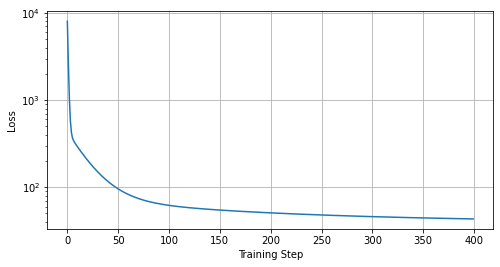

In [15]:
# execute this cell to plot your loss as it changed during training
# note that the y-axis is plotted on a log-scale
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(losses)
ax.set_yscale('log')
ax.set_ylabel("Loss")
ax.set_xlabel("Training Step");
ax.grid(True)

## Results

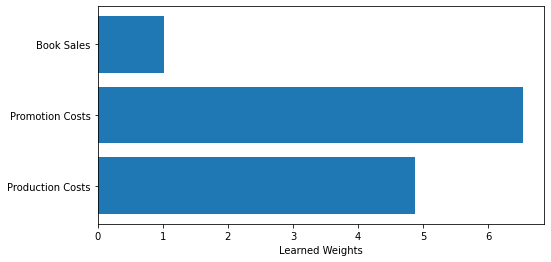

In [66]:
# Execute this cell to visualize what weighting your model learned
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(np.arange(3), A[1:])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Production Costs', 'Promotion Costs', 'Book Sales'])
ax.set_xlabel("Learned Weights");

Our model seems to have learned that the amount of money spent on promoting the movie has the highest effect on total box office success. Using [regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) it is possible to determine confidence intervals for these weights, but that is beyond the scope of this course.

Let's perform a regression only using the promotional costs data and visualize our results. The red line will indicate the (linear) prediction made by our trained model, and the blue dots show the true box-office earnings.

In [17]:
X_prom = X[:, (0, 2)]
A_prom = np.random.normal(size=(2,))

step_size = 0.001
iterations = 400

##STUDENT CODE GOES HERE##
# perform the same training as before, but
# use `X_prom` and `A_prom` as the data and model weights
step_size = 0.001
iterations = 400

for _ in range(iterations):
    loss, grad = loss_and_gradient(X_prom, A_prom, y)
    A_prom -= step_size * grad

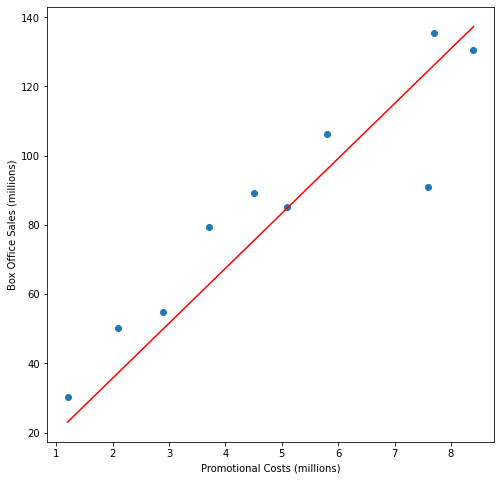

In [18]:
# execute this cell to visualize the linear model that was
# learned to map promotional costs to predicted box office sales
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data['Promotion Costs'], data['Box Office Sales'])
x_dat = np.array([min(data['Promotion Costs']), max(data['Promotion Costs'])])
y_dat = [A_prom[0] + A_prom[1] * x for x in x_dat]
ax.plot(x_dat, y_dat, c='r')
ax.set_xlabel("Promotional Costs (millions)")
ax.set_ylabel("Box Office Sales (millions)")
pass

# Conclusions
To summarize, we have just used gradient-based optimization to "teach" a model the dependency between some data (expenses and book sales) and a quantity that we care about (the total box office sales). Although this model might not be able to play chess, converse with a human, or drive a car, it _is_ using machine learning at its core. In fact, if you revisit the "Perspective on Machine Learning" module, you'll see that all of those applications use the same approach for a wide variety of applications, many of which have inspired lucrative businesses and profound technical breakthroughs.

By completing this assignment, you have been introduced to

* Gradient descent and optimization
* Linear regression, a powerful and widely-applied technique in machine learning
* Data-driven applications (knowing nothing at the start and _learning_ dependencies that are present in your data)

In the next machine learning unit we'll cover

* Optimization for differentiable composite functions
* Some other machine learning algorithms (logistic regression, SVMs)
* Deep learning with neural networks